### LOSS FUNCTIONS FOR DEEP LEARNING

Loss functions are very important in the machine learning world. They serve as ways to measure the distance or difference between our models predicted output $Y^{hat}$ and the true output usually from our ground truth label $Y$. Below are some of the important Loss functions and they are all implemented using tensorflow library.

>To see how the different loss functions perform, we are going to plot them using Matplotlib, a python plotting library

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

#Start a session
sess = tf.Session()

#### Loss functions for regression algorithm.
>Regression algorithms are simply algorithms that predicts a continous number as output. i.e The output do not have a finite range, it can be from negative infinity to positive infinity

- In-order to plot these losses, We will create a random sequence for predictions and targets as a tensorflow tensor.

In [3]:
#predictions
Y_pred = tf.linspace(-1., 1., 500)
Y_truth = tf.constant(0.)

#### L2 Norm loss/ Euclidean loss function
This is just the square of the the difference/distance between the predicted value and the true value. The L2 norm loss is good because it is very curved or seem to converge near the target and algorithms can use this fact to converge to the target more slowly and avoid over-shooting the minimum.
> $L2 = (Y_{true} - Y_{pred})^2$

Text(0,0.5,'$Y_{true}$')

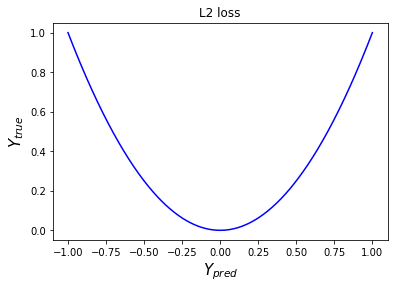

In [4]:
#Calculating the L2 loss
val = tf.square(Y_truth - Y_pred)
L2_val = sess.run(val)

#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, L2_val, 'b-', label='L2 loss' )
plt.title('L2 loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)

    


> Note: Tensorflow has a built function for L2 loss ```nn.l2_loss()```. But tensorflow's L2 divides the result by 2, usually for scaling.

####  L1 norm loss/ Absolute loss function
The L1 loss is the same as the L2 loss but instead of taking the square of the distance, we just take the absolute value.  The L1 norm is better in detect outliers than the L2 norm because it is not steep for very large values. A major point to note is that L2 is not smooth when close to the target/minimun and this can cause non-convergence for algorithms.

Text(0,0.5,'$Y_{true}$')

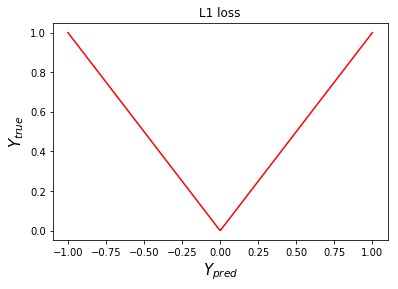

In [5]:
#Computing L1 loss with same values 
#Calculating the L2 loss
temp = tf.abs(Y_truth - Y_pred)
L1_val = sess.run(temp)

#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, L1_val, 'r-' )
plt.title('L1 loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)


#### Pseudo-Huber loss
Pseudo-huber loss is a variant of the Huber loss function, It takes the best properties of the L1 and L2 loss by being convex close to the target and less steep for extreme values. This loss depends on an extra parameter $delta$ - $\delta$ which dictates how steep the function will be.

>$$ {\displaystyle L_{\delta }(a)=\delta ^{2}\left({\sqrt {1+(a/\delta )^{2}}}-1\right).}$$

- Where a = $(Y_{truth} - Y_{pred})$

Text(0,0.5,'$Y_{true}$')

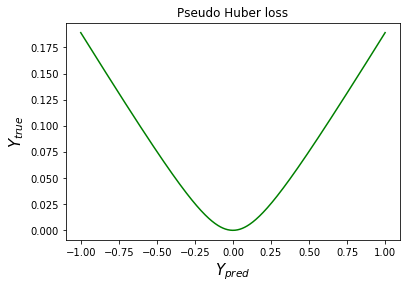

In [6]:
#Plot of the Pseudo-Huber loss
delta = tf.constant(0.24)
temp_ph = tf.multiply(tf.square(delta),tf.sqrt(1. + tf.square((Y_truth - Y_pred) / delta)) - 1. )

pseudo_h_vals = sess.run(temp_ph)

#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, pseudo_h_vals, 'g-' )
plt.title('Pseudo Huber loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)


#### Classification Loss functions
These losses are used to evaluate distances between categorical values.


In [7]:
#Redefining our data
Y_pred = tf.linspace(-4., 6., 500)
Y_label = tf.constant(1.)
Y_labels = tf.fill([500,], 1.)

#### Cross entropy Loss
Cross entropy loss sometimes referred to as the logistice loss function. Cross entropy loss for binary classification, that is when we are predicting two classes 0 and 1. Here we wish to measure the distance from the actual class (0 or 1) to the predicted value, which is usually a real number between 0 and 1.
>$$H(p,q)\ =\ -\sum _{i}p_{i}\log q_{i}\ =\ -y\log {\hat  {y}}-(1-y)\log(1-{\hat  {y}})$$


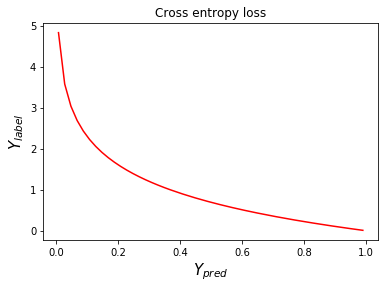

In [11]:
#applying sigmoid
x_entropy_vals = - tf.multiply(Y_label, tf.log(Y_pred)) - tf.multiply((1. - Y_label), tf.log(1. - Y_pred))
x_entropy_loss = sess.run(x_entropy_vals)

#ploting the predicted values against the cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_loss,'r-' )
plt.title('Cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.show()

#### Sigmoid cross entropy loss
This is very similar to the cross entropy loss function, except that we transform the x-values by the sigmoid function before applying the cross entropy loss.

>Using the tensorflow function below, where Logits is the tensor we want to apply sigmoid to, this is usually the predicted values of our model while labels is the ground truth values

```
tf.nn.sigmoid_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    name=None
)```

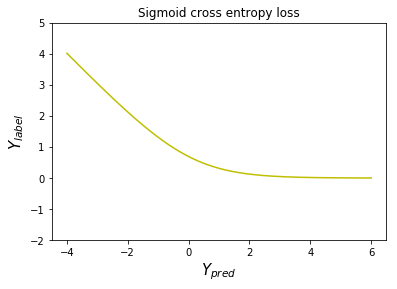

In [47]:
x_entropy_sigmoid_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels= Y_labels, logits=Y_pred)
x_entropy_sigmoid_out = sess.run(x_entropy_sigmoid_vals)

#ploting the predicted values against the Sigmoid cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_sigmoid_out, 'y-' )
plt.title('Sigmoid cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()

#### Weighted cross entropy loss
This is a weighted version of the sigmoid cross entropy loss. Here we provide a weight on the positive target. I.e the higher the weight we specify, the higher the peek of the positie values. This can be use to control peekiness or outliers for positve predictions.

```
tf.nn.weighted_cross_entropy_with_logits(
    targets,
    logits,
    pos_weight,
    name=None
)
```

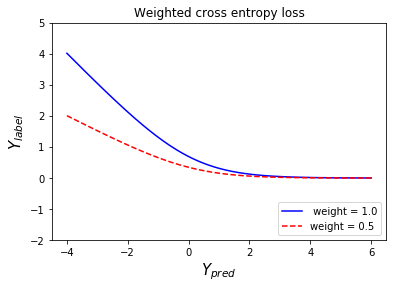

In [63]:
#comparing two weights
weight = tf.constant(1.)
x_entropy_weighted_vals = tf.nn.weighted_cross_entropy_with_logits(targets=Y_labels, logits=Y_pred, pos_weight=weight)
x_entropy_weighted_out = sess.run(x_entropy_weighted_vals)

weight2 = tf.constant(0.5)
x_entropy_weighted_val_2 = tf.nn.weighted_cross_entropy_with_logits(targets=Y_labels, logits=Y_pred, pos_weight=weight2)
x_entropy_weighted_out_2 = sess.run(x_entropy_weighted_val_2)

#ploting the predicted values against the Sigmoid cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_weighted_out, 'b-', label=' weight = 1.0' )
plt.plot(Y_array, x_entropy_weighted_out_2, 'r--', label='weight = 0.5' )
plt.title('Weighted cross entropy loss')
plt.legend(loc=4)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()

#### Softmax cross entropy loss
This loss is used to measure a loss when there is only one target category instead of multiple. Because of this, the function first uses a softmax function to transform the outputs into a probability distribution which all sums to 1, and then computes the loss function from the true probability distribution.

In [65]:
y_pred_dist = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist, logits=y_pred_dist)
print(sess.run(softmax_xentropy))

[1.1601256]


#### Sparse softmax cross entropy
This loss is the same as previous one, except instead of the target being a probability distribution, it is an index of which category is true. Instead of a sparse all-zero target vector with one value of one, we just pass in the index of which category is the true value, as follows:

In [71]:
y_pred = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])  #true value is in the second position of the sparse tensor
sparse_x_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels= sparse_target_dist, logits=y_pred)
print(sess.run(sparse_x_entropy))


[0.00012564]
